In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear awlgebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
games = pd.read_csv('games.csv')
players = pd.read_csv('players.csv')
plays = pd.read_csv('plays.csv')
tackles = pd.read_csv('tackles.csv')
df = pd.read_csv('new_df_filtered.csv', index_col=0)

In [28]:
df['orientationDifference'] = df['orientationDifference'].apply(lambda x: x if x < 180 else 360 - x)
df['motionAngleDifference'] = df['motionAngleDifference'].apply(lambda x: x if x < 180 else 360 - x)
df['distanceCovered'] = df.groupby(['gameId', 'playId', 'nflId'])['dis'].cumsum()

def height_to_inches(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches

players['height_inches'] = players['height'].apply(height_to_inches)

df = pd.merge(df, players[['nflId', 'weight', 'height_inches']], on='nflId', how='left')

In [29]:
#df['yardsGained'] = df.groupby(['gameId', 'playId', 'nflId'])['x'].transform(lambda x: x.iloc[-1]) - df.groupby(['gameId', 'playId', 'nflId'])['x'].transform(lambda x: x.iloc[1])

In [30]:
df[(df['gameId']==2022090800)&(df['playId']==414)&(df['nflId']==52647.0)]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,forcedFumble,pff_missedTackle,footballDistance,carrierDistance,orientationDifference,motionAngleDifference,speedDifference,distanceCovered,weight,height_inches
7608,2022090800,414,52647.0,Dane Jackson,1,2022-09-08 20:36:24.200000,30.0,BUF,right,65.25,...,0.0,0.0,15.715198,15.461960,40.31,28.52,-0.35,0.39,185,71
7630,2022090800,414,52647.0,Dane Jackson,2,2022-09-08 20:36:24.299999,30.0,BUF,right,65.53,...,0.0,0.0,15.664040,15.528793,38.33,14.77,-0.58,0.76,185,71
7652,2022090800,414,52647.0,Dane Jackson,3,2022-09-08 20:36:24.400000,30.0,BUF,right,65.75,...,0.0,0.0,15.567878,15.502110,145.45,1.12,-0.84,1.11,185,71
7674,2022090800,414,52647.0,Dane Jackson,4,2022-09-08 20:36:24.500000,30.0,BUF,right,65.92,...,0.0,0.0,15.405257,15.398406,178.03,15.55,-0.93,1.47,185,71
7696,2022090800,414,52647.0,Dane Jackson,5,2022-09-08 20:36:24.599999,30.0,BUF,right,66.02,...,0.0,0.0,15.176726,15.188275,173.99,29.35,-0.92,1.85,185,71
7718,2022090800,414,52647.0,Dane Jackson,6,2022-09-08 20:36:24.700000,30.0,BUF,right,66.07,...,0.0,0.0,14.860991,14.912481,168.57,40.40,-0.80,2.25,185,71
7740,2022090800,414,52647.0,Dane Jackson,7,2022-09-08 20:36:24.799999,30.0,BUF,right,66.07,...,0.0,0.0,14.487547,14.556387,167.94,47.33,-0.86,2.68,185,71
7762,2022090800,414,52647.0,Dane Jackson,8,2022-09-08 20:36:24.900000,30.0,BUF,right,66.02,...,0.0,0.0,14.034120,14.124663,151.56,54.12,-0.78,3.13,185,71
7784,2022090800,414,52647.0,Dane Jackson,9,2022-09-08 20:36:25.000000,30.0,BUF,right,65.92,...,0.0,0.0,13.556697,13.647249,151.56,59.24,-0.63,3.61,185,71
7806,2022090800,414,52647.0,Dane Jackson,10,2022-09-08 20:36:25.099999,30.0,BUF,right,65.79,...,0.0,0.0,13.028969,13.130621,150.89,62.61,-0.62,4.11,185,71


In [31]:
df.loc[(df['carrierDistance'] > 2.5)&(df['event']=='tackle')&(df['isTackler']==1), :]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,forcedFumble,pff_missedTackle,footballDistance,carrierDistance,orientationDifference,motionAngleDifference,speedDifference,distanceCovered,weight,height_inches
8246,2022090800,414,52647.0,Dane Jackson,30,2022-09-08 20:36:27.099999,30.0,BUF,right,59.73,...,0.0,0.0,2.785823,3.032375,152.98,130.46,-2.19,13.13,185,71
20226,2022090800,1358,44976.0,Matt Milano,44,2022-09-08 21:14:08.000000,58.0,BUF,left,36.76,...,0.0,0.0,2.550687,2.710166,163.15,22.70,-0.69,11.48,223,72
57047,2022090800,3576,40107.0,Micah Hyde,65,2022-09-08 23:03:17.700000,23.0,BUF,left,26.67,...,0.0,0.0,3.594356,3.918074,106.08,139.57,-4.54,32.19,197,72
96927,2022091100,2114,53469.0,Richie Grant,44,2022-09-11 14:45:43.099999,27.0,ATL,left,64.53,...,0.0,0.0,4.858241,4.880461,158.97,35.76,-4.24,9.16,194,72
126958,2022091100,4032,53469.0,Richie Grant,5,2022-09-11 16:01:46.599999,27.0,ATL,right,67.69,...,0.0,0.0,3.159050,3.620842,79.22,73.88,1.13,2.97,194,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073618,2022110700,1482,40017.0,Tyrann Mathieu,14,2022-11-07 21:13:26.799999,32.0,NO,left,33.96,...,0.0,0.0,2.852455,2.824500,143.35,45.39,0.31,2.39,190,69
9075017,2022110700,1532,52665.0,Malcolm Roach,63,2022-11-07 21:17:50.500000,97.0,NO,left,24.30,...,0.0,0.0,3.246799,3.394775,109.81,24.15,-2.47,17.30,290,75
9080707,2022110700,2043,44851.0,Marcus Maye,49,2022-11-07 21:49:57.400000,6.0,NO,right,51.24,...,0.0,0.0,3.940051,4.400284,4.58,65.23,-1.98,17.54,207,72
9083357,2022110700,2131,53505.0,Paulson Adebo,48,2022-11-07 21:52:52.299999,29.0,NO,right,72.47,...,0.0,0.0,4.508347,4.434242,103.22,115.87,-1.76,7.69,193,72


In [32]:
#df.drop(df.loc[(df['carrierDistance'] > 2.5)&(df['event']=='tackle')&(df['isTackler']==1)].index, inplace=True)
#df.drop(df.loc[(df['event']=='tackle')&(df['isTackler']==1)].index, inplace=True)

[]

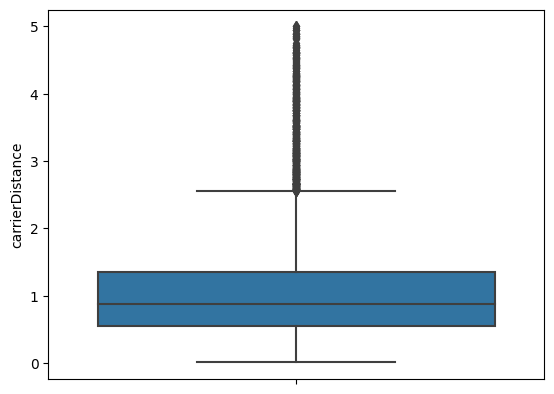

In [33]:
sns.boxplot(data = df[(df['event']=='tackle')&(df['isTackler']==1)], y='carrierDistance')
plt.plot()

In [34]:
df['event'] = df['event'].apply(lambda x: 1 if x=='tackle' else 0)

In [35]:
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'isCarrier', 'isTackler', 'isAssistant', 'forcedFumble',
       'pff_missedTackle', 'footballDistance', 'carrierDistance',
       'orientationDifference', 'motionAngleDifference', 'speedDifference',
       'distanceCovered', 'weight', 'height_inches'],
      dtype='object')

In [36]:
df.drop(df.loc[df['displayName']=='football'].index, inplace=True)

In [37]:
y = df['event']
X = df[['frameId', 's', 'a', 'dis', 'carrierDistance', 'orientationDifference', 'motionAngleDifference']]

In [38]:
X

,frameId,s,a,dis,carrierDistance,orientationDifference,motionAngleDifference
0,1,1.15,1.42,0.12,12.614856,120.21,62.79
1,1,3.35,2.62,0.32,7.067538,124.80,155.51
2,1,3.62,2.86,0.37,13.527265,71.89,44.55
3,1,1.42,0.64,0.14,10.456003,168.05,144.95
4,1,4.61,4.82,0.45,0.000000,0.00,0.00
...,...,...,...,...,...,...,...
9118995,35,5.59,0.41,0.56,19.715603,87.19,66.85
9118996,35,0.81,0.80,0.08,10.325604,59.45,19.22
9118997,35,1.74,2.74,0.18,1.462771,31.32,32.42
9118998,35,1.92,2.40,0.21,12.336296,113.17,70.01


In [39]:
y

0          0
1          0
2          0
3          0
4          0
          ..
9118995    1
9118996    1
9118997    1
9118998    1
9118999    1
Name: event, Length: 9119000, dtype: int64

In [40]:
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'isCarrier', 'isTackler', 'isAssistant', 'forcedFumble',
       'pff_missedTackle', 'footballDistance', 'carrierDistance',
       'orientationDifference', 'motionAngleDifference', 'speedDifference',
       'distanceCovered', 'weight', 'height_inches'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature: 0, Score: 0.02937
Feature: 1, Score: -0.74568
Feature: 2, Score: -0.36075
Feature: 3, Score: 0.20415
Feature: 4, Score: -0.48629
Feature: 5, Score: -0.11264
Feature: 6, Score: 0.72782


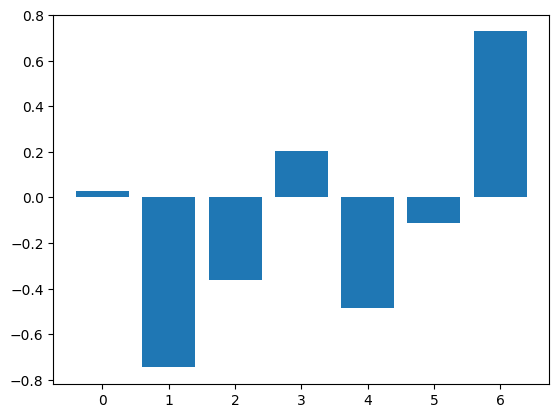

In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=100000, n_features=7, n_informative=4, n_redundant=3, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [43]:
model.score(X, y)

0.77658

In [44]:
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'isCarrier', 'isTackler', 'isAssistant', 'forcedFumble',
       'pff_missedTackle', 'footballDistance', 'carrierDistance',
       'orientationDifference', 'motionAngleDifference', 'speedDifference',
       'distanceCovered', 'weight', 'height_inches'],
      dtype='object')

[]

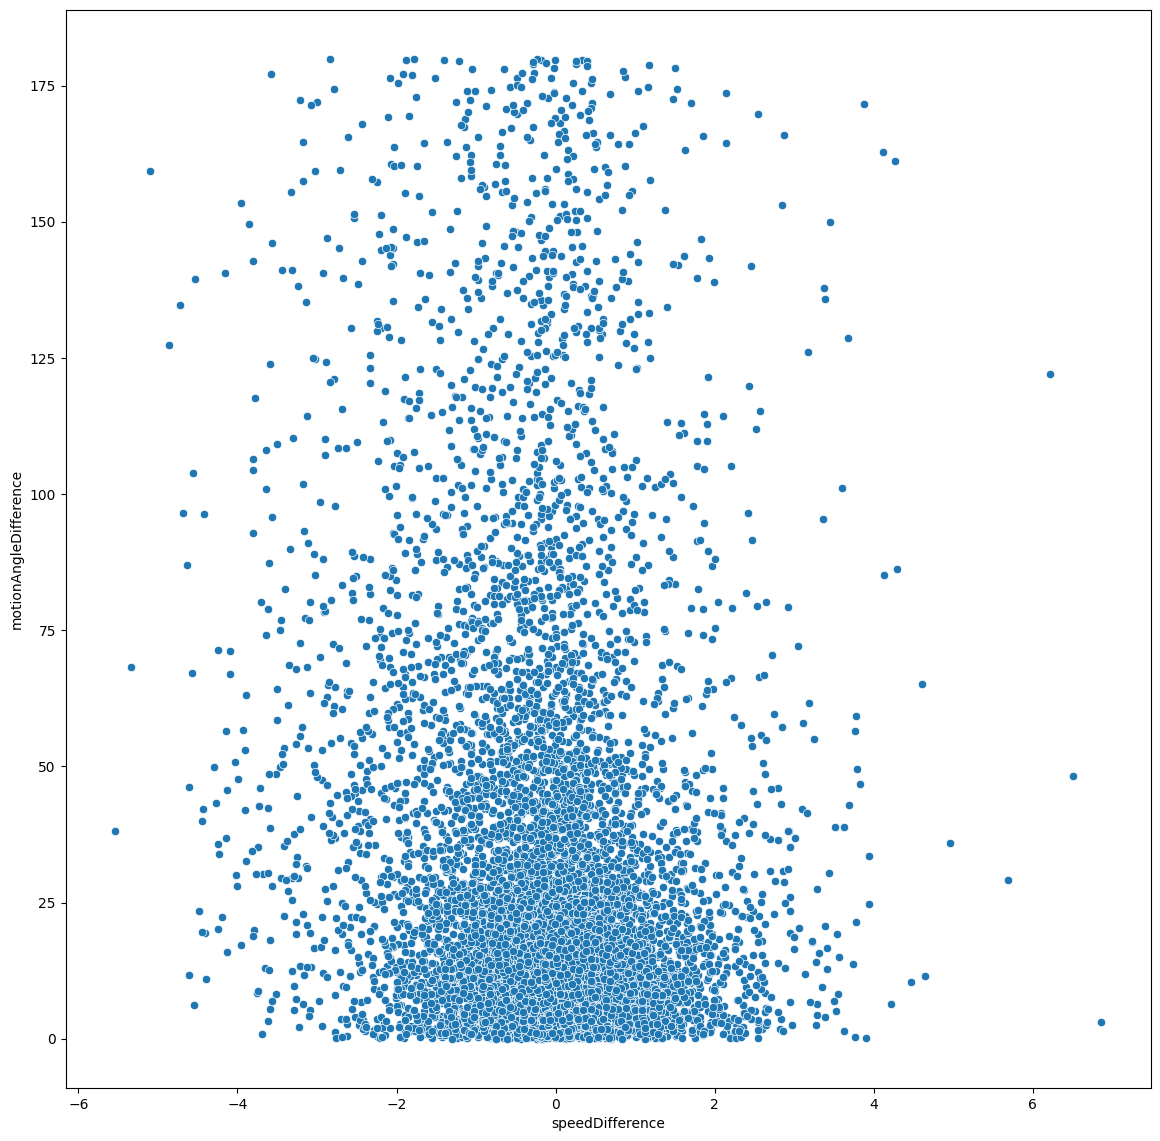

In [45]:
plt.figure(figsize=(14,14))
sns.scatterplot(data = df[(df['isTackler']==1)&(df['event']==1)], y='motionAngleDifference', x='speedDifference')
plt.plot()

In [46]:
from sklearn.cluster import KMeans

X = df[(df['isTackler']==1)&(df['event']==1)].copy()
y = X.pop("event")


# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = ['speedDifference','motionAngleDifference']


# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=5, n_init=5, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype('category')
category_mapping = {0: 'Rear tackle', 1: 'Frontal tackle', 2: 'Controlled tackle', 3: 'Receiving tackle', 4: 'Aggresive tackle'}
X["Cluster"] = X["Cluster"].cat.rename_categories(category_mapping)

[]

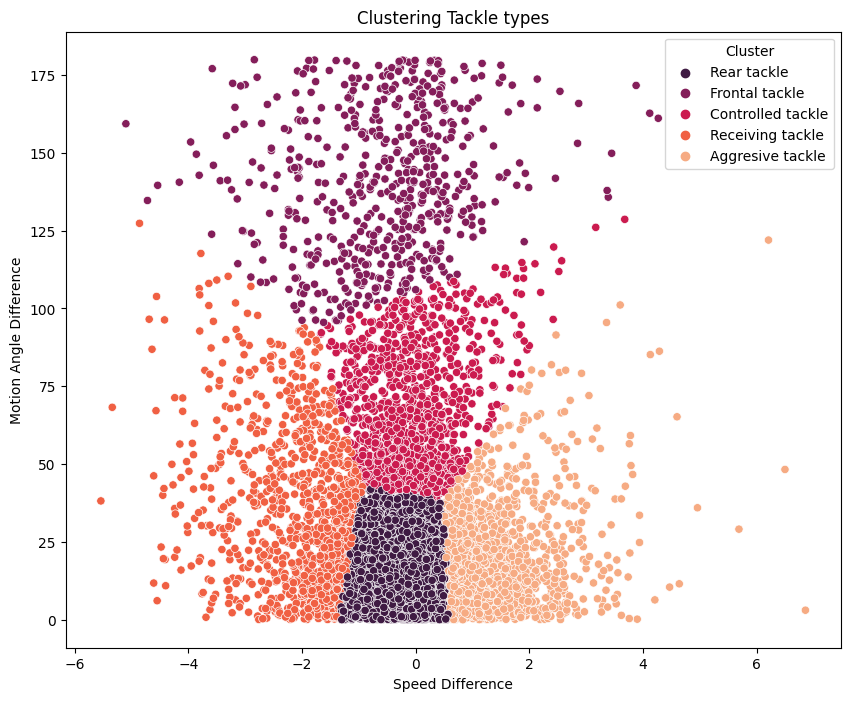

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=X, x="speedDifference", y="motionAngleDifference", hue="Cluster", palette='rocket')
plt.title('Clustering Tackle types')
plt.xlabel('Speed Difference')
plt.ylabel('Motion Angle Difference')
plt.savefig('clustering.png')
plt.plot()

<Axes: xlabel='Cluster', ylabel='speedDifference'>

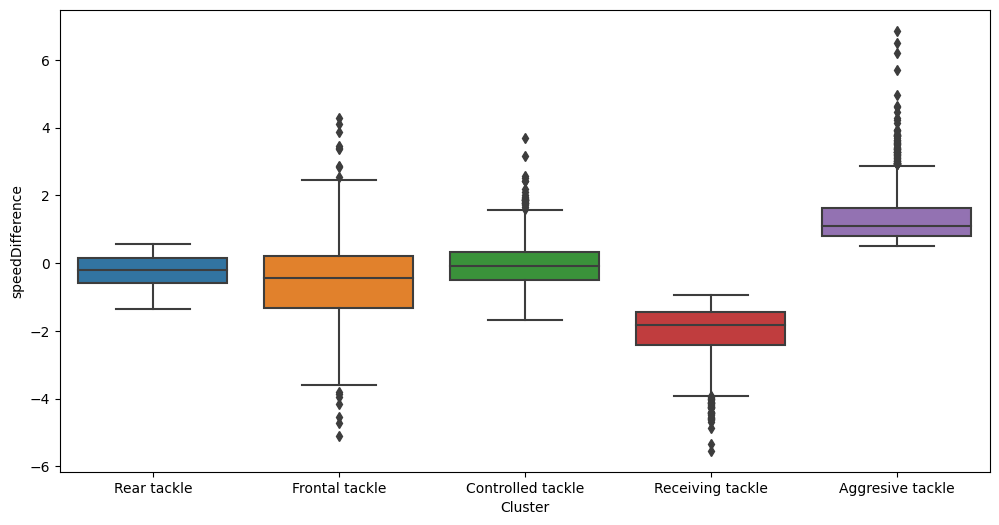

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="speedDifference")

<Axes: xlabel='Cluster', ylabel='motionAngleDifference'>

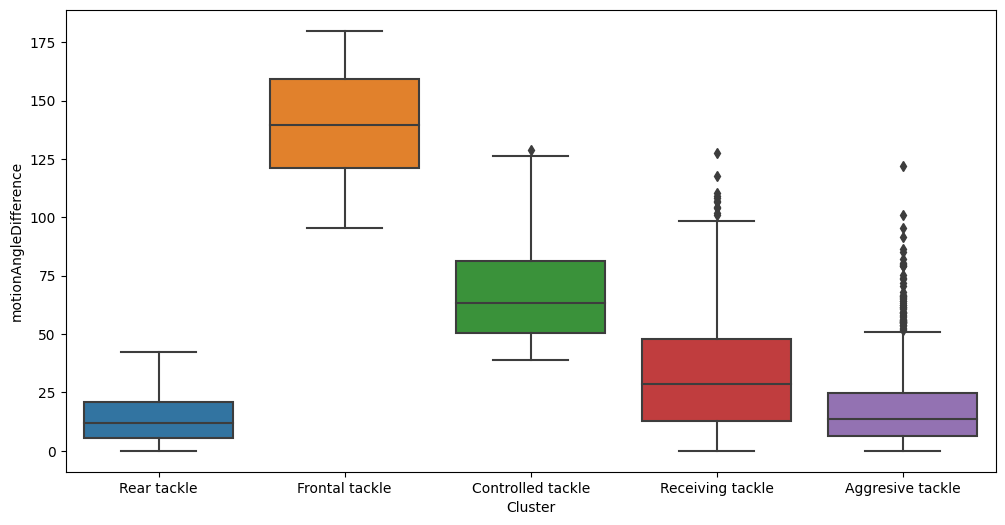

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="motionAngleDifference")

<Figure size 640x480 with 0 Axes>

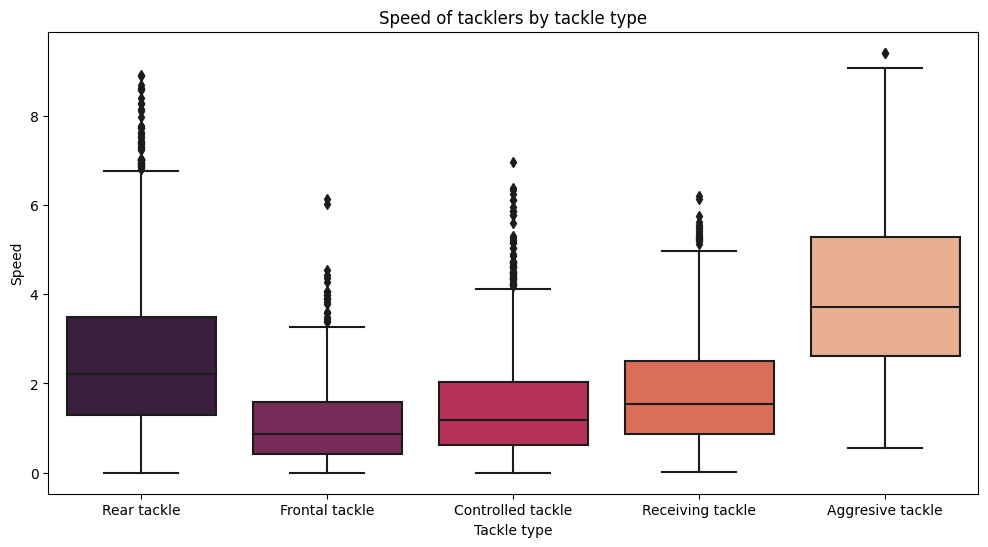

In [50]:
plt.close()
plt.clf()
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="s", palette='rocket')
plt.xlabel('Tackle type')
plt.ylabel('Speed')
plt.title('Speed of tacklers by tackle type')
plt.savefig('speed.png')
plt.show()

In [51]:
players[players['displayName']=='Myles Jack']

,nflId,height,weight,birthDate,collegeName,position,displayName,height_inches
308,43325,6-1,244,1995-09-03,UCLA,ILB,Myles Jack,73


In [52]:
df[df['displayName']=='Jonathan Owens']

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,forcedFumble,pff_missedTackle,footballDistance,carrierDistance,orientationDifference,motionAngleDifference,speedDifference,distanceCovered,weight,height_inches
423424,2022091105,56,46669.0,Jonathan Owens,1,2022-09-11 13:04:52.500000,36.0,HOU,left,71.67,...,0.0,0.0,15.704476,21.187402,162.52,12.21,0.09,0.01,210,71
423446,2022091105,56,46669.0,Jonathan Owens,2,2022-09-11 13:04:52.599999,36.0,HOU,left,71.66,...,0.0,0.0,15.707405,21.190927,161.73,22.34,0.08,0.03,210,71
423468,2022091105,56,46669.0,Jonathan Owens,3,2022-09-11 13:04:52.700000,36.0,HOU,left,71.65,...,0.0,0.0,15.699470,21.179247,160.89,58.63,0.12,0.06,210,71
423490,2022091105,56,46669.0,Jonathan Owens,4,2022-09-11 13:04:52.799999,36.0,HOU,left,71.63,...,0.0,0.0,15.694590,21.176272,157.22,96.77,0.17,0.10,210,71
423512,2022091105,56,46669.0,Jonathan Owens,5,2022-09-11 13:04:52.900000,36.0,HOU,left,71.60,...,0.0,0.0,17.438142,21.161952,156.03,155.09,0.32,0.18,210,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8315526,2022110300,2761,46669.0,Jonathan Owens,49,2022-11-03 22:28:33.400000,36.0,HOU,left,15.06,...,0.0,0.0,5.532495,5.428996,121.29,172.26,-1.52,14.31,210,71
8315548,2022110300,2761,46669.0,Jonathan Owens,50,2022-11-03 22:28:33.500000,36.0,HOU,left,15.10,...,0.0,0.0,5.295318,5.192649,107.48,158.85,-1.01,14.42,210,71
8315570,2022110300,2761,46669.0,Jonathan Owens,51,2022-11-03 22:28:33.599999,36.0,HOU,left,15.13,...,0.0,0.0,5.034620,4.953231,95.00,151.11,-0.56,14.55,210,71
8315593,2022110300,2782,46669.0,Jonathan Owens,1,2022-11-03 22:29:16.700000,36.0,HOU,left,10.96,...,0.0,0.0,2.403082,2.500000,101.59,2.00,0.43,0.83,210,71


<Axes: xlabel='Cluster', ylabel='a'>

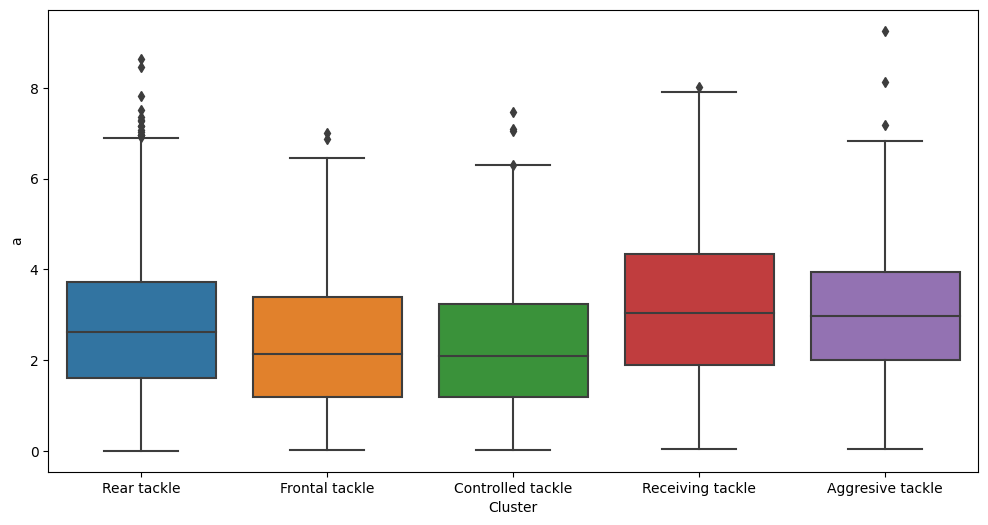

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="a")

<Axes: xlabel='Cluster', ylabel='weight'>

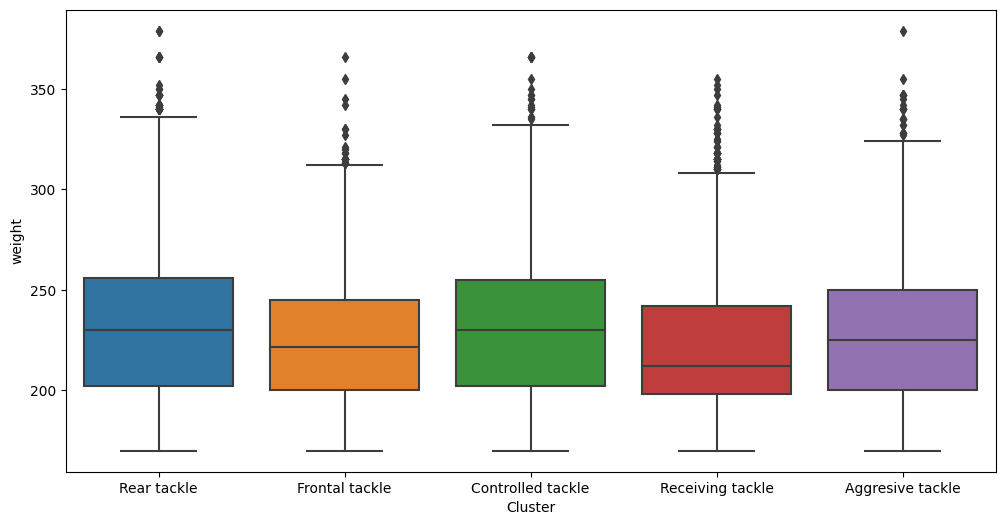

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="weight")

<Axes: xlabel='Cluster', ylabel='height_inches'>

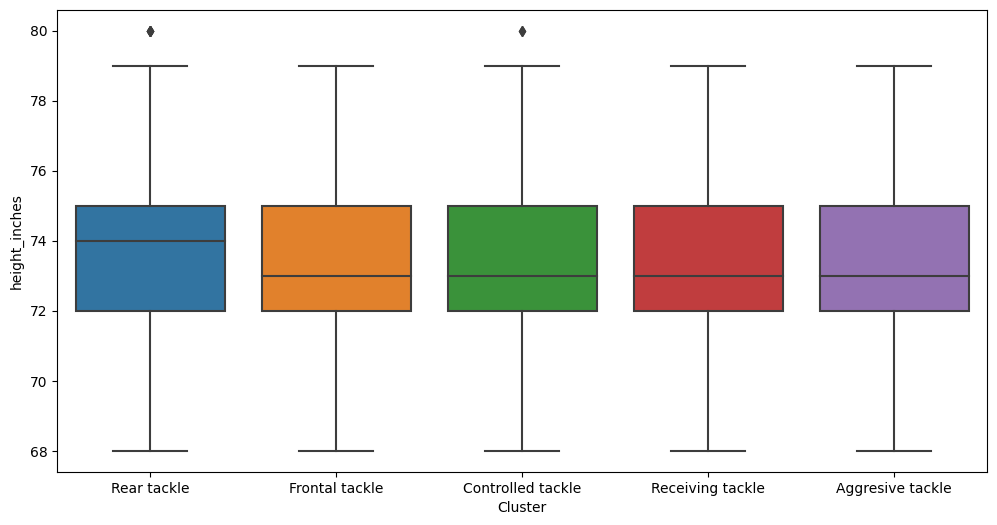

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X, x="Cluster", y="height_inches")

In [56]:
clubs = X.groupby('club')['Cluster'].value_counts() / X.groupby('club')['Cluster'].count()

In [57]:
X.groupby('Cluster')['a'].count().reset_index()

,Cluster,a
0,Rear tackle,3539
1,Frontal tackle,580
2,Controlled tackle,1097
3,Receiving tackle,1082
4,Aggresive tackle,1711


<Figure size 640x480 with 0 Axes>

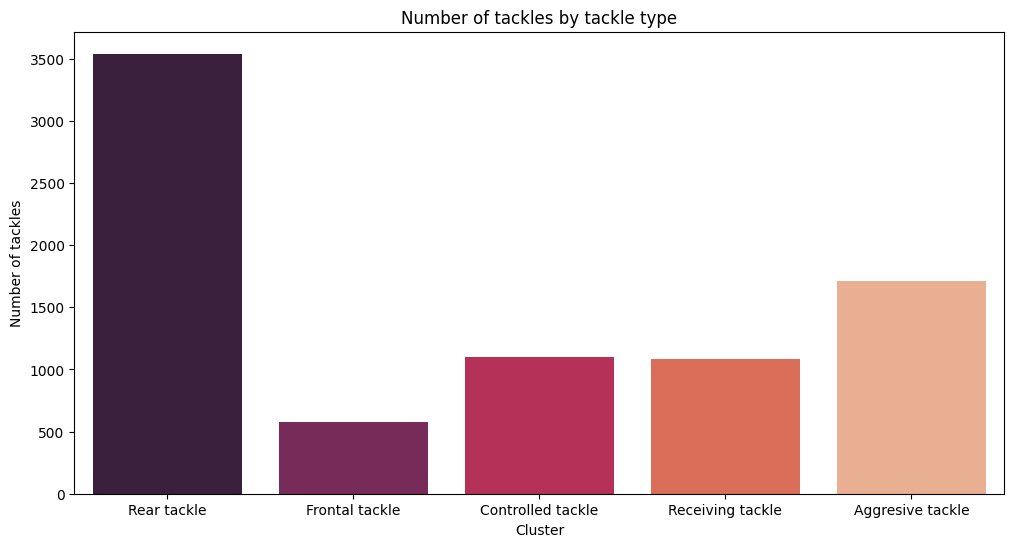

In [58]:
plt.close()
plt.clf()
plt.figure(figsize=(12,6))
sns.barplot(data=X.groupby('Cluster')['a'].count().reset_index(), x='Cluster', y='a', palette='rocket')
plt.ylabel('Number of tackles')
plt.title('Number of tackles by tackle type')
plt.savefig('tackles_number.png')
plt.show()

<Axes: xlabel='club'>

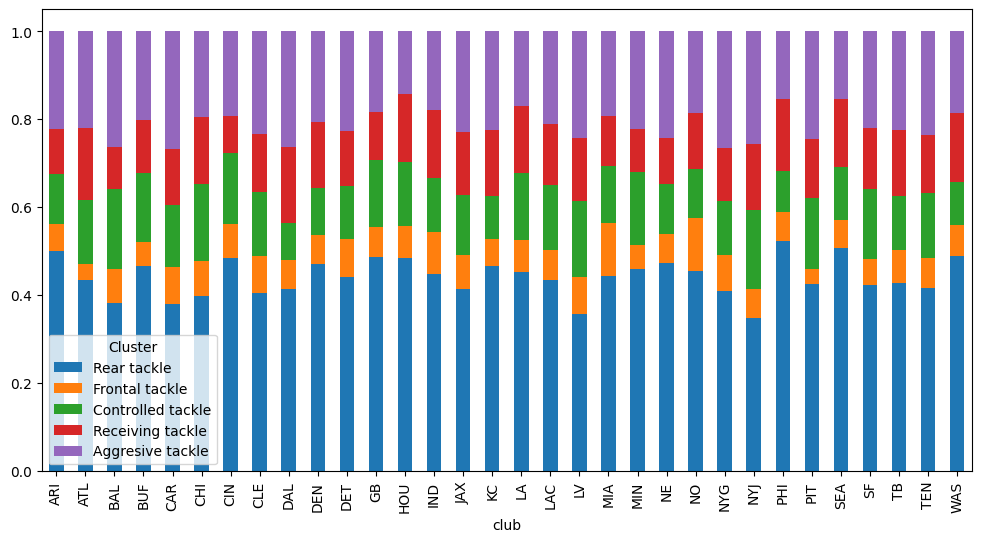

In [59]:
clubs.unstack().plot(kind='bar', stacked=True, figsize=(12,6))

In [60]:
players_stats = X.groupby('displayName')['x'].count().reset_index()
players_stats = players_stats[players_stats['x']>30]

In [61]:
result = (X.groupby('displayName')['Cluster'].value_counts() / X.groupby('displayName')['Cluster'].count()).reset_index(name='percentage')
result = pd.merge(result, players_stats, on='displayName', how='inner')
result_unstacked = result.pivot(index='displayName', columns='Cluster', values='percentage')

<Figure size 640x480 with 0 Axes>

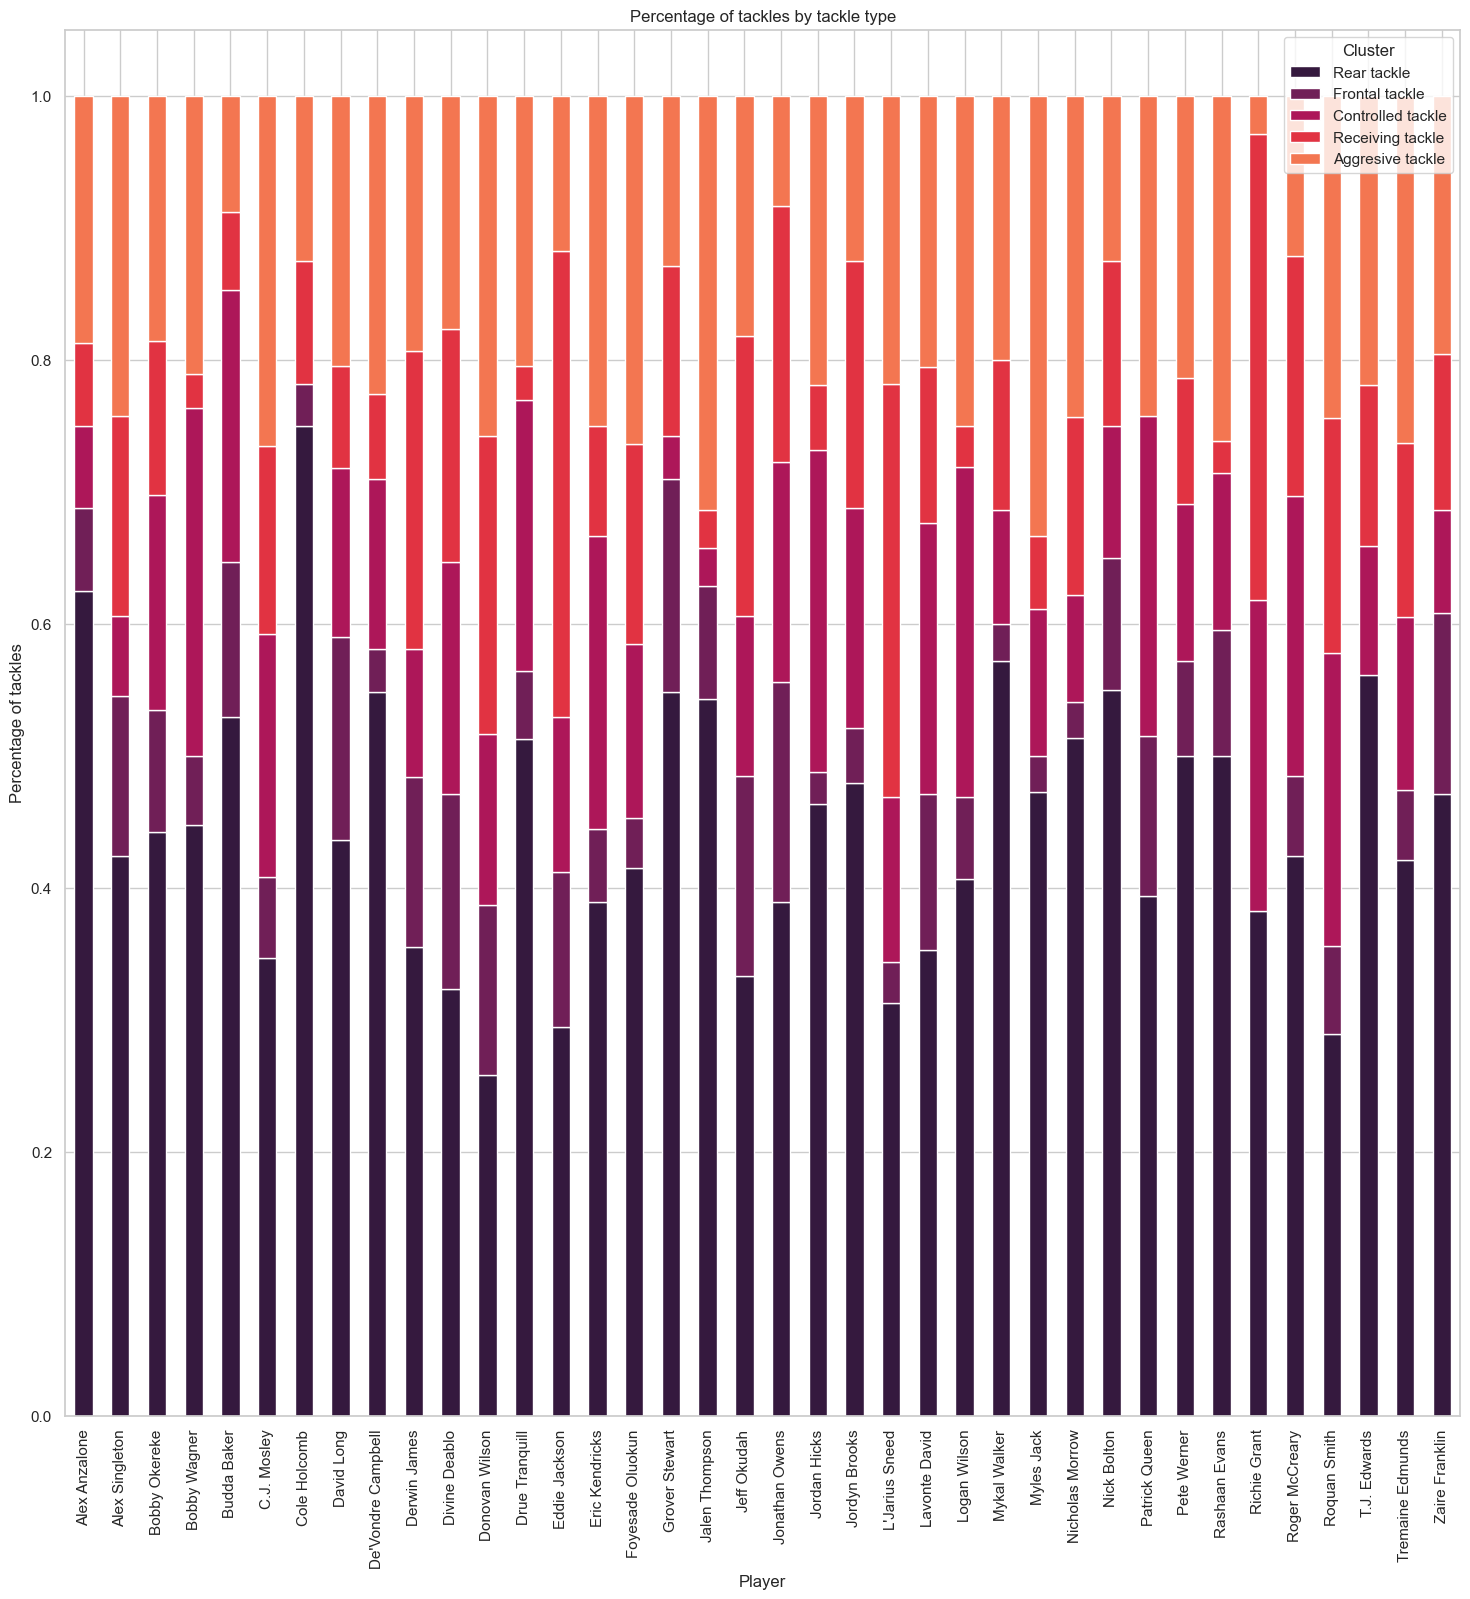

In [62]:
plt.close()
plt.clf()
sns.set(style="whitegrid")
seaborn_palette = sns.color_palette("rocket")
result_unstacked.plot(kind='bar', stacked=True, figsize=(18,18), color=seaborn_palette)
plt.xlabel('Player')
plt.ylabel('Percentage of tackles')
plt.title('Percentage of tackles by tackle type')
plt.savefig('tackles_percentage.png')
plt.show()

In [63]:
result[result['Cluster']=='Head-on tackle'].sort_values(by='percentage', ascending=False).head(5)

,displayName,Cluster,percentage,x


In [64]:
result[result['Cluster']=='Rear tackle'].sort_values(by='percentage', ascending=False).head(5)

,displayName,Cluster,percentage,x
30,Cole Holcomb,Rear tackle,0.750000,32
0,Alex Anzalone,Rear tackle,0.625000,32
125,Mykal Walker,Rear tackle,0.571429,35
175,T.J. Edwards,Rear tackle,0.560976,41
140,Nick Bolton,Rear tackle,0.550000,40


In [65]:
result[result['Cluster']=='Controlled tackle'].sort_values(by='percentage', ascending=False).head(5)

,displayName,Cluster,percentage,x
16,Bobby Wagner,Controlled tackle,0.263158,38
121,Logan Wilson,Controlled tackle,0.250000,32
101,Jordan Hicks,Controlled tackle,0.243902,41
146,Patrick Queen,Controlled tackle,0.242424,33
162,Richie Grant,Controlled tackle,0.235294,34


In [66]:
result[result['Cluster']=='Receiving tackle'].sort_values(by='percentage', ascending=False).head(5)

,displayName,Cluster,percentage,x
65,Eddie Jackson,Receiving tackle,0.352941,34
161,Richie Grant,Receiving tackle,0.352941,34
111,L'Jarius Sneed,Receiving tackle,0.312500,32
57,Donovan Wilson,Receiving tackle,0.225806,31
46,Derwin James,Receiving tackle,0.225806,31


In [67]:
result[result['Cluster']=='Aggresive tackle'].sort_values(by='percentage', ascending=False).head(5)

,displayName,Cluster,percentage,x
131,Myles Jack,Aggresive tackle,0.333333,36
86,Jalen Thompson,Aggresive tackle,0.314286,35
26,C.J. Mosley,Aggresive tackle,0.265306,49
76,Foyesade Oluokun,Aggresive tackle,0.264151,53
181,Tremaine Edmunds,Aggresive tackle,0.263158,38


In [68]:
df

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,forcedFumble,pff_missedTackle,footballDistance,carrierDistance,orientationDifference,motionAngleDifference,speedDifference,distanceCovered,weight,height_inches
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,...,0.0,0.0,15.140187,12.614856,120.21,62.79,-3.46,0.12,325,77
1,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,...,0.0,0.0,8.790687,7.067538,124.80,155.51,-1.26,0.32,242,72
2,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,...,0.0,0.0,15.854014,13.527265,71.89,44.55,-0.99,0.37,280,73
3,2022090800,56,42392.0,Mitch Morse,1,2022-09-08 20:24:05.700000,60.0,BUF,left,88.21,...,0.0,0.0,12.937096,10.456003,168.05,144.95,-3.19,0.14,305,78
4,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.700000,14.0,BUF,left,79.85,...,0.0,0.0,2.533869,0.000000,0.00,0.00,0.00,0.45,191,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118995,2022110700,3787,53533.0,Brandon Stephens,35,2022-11-07 23:06:49.200000,21.0,BAL,right,33.19,...,0.0,0.0,19.760086,19.715603,87.19,66.85,3.99,7.67,206,72
9118996,2022110700,3787,54476.0,Chris Olave,35,2022-11-07 23:06:49.200000,12.0,NO,right,29.14,...,0.0,0.0,10.292877,10.325604,59.45,19.22,-0.79,8.95,185,73
9118997,2022110700,3787,54541.0,Travis Jones,35,2022-11-07 23:06:49.200000,98.0,BAL,right,24.78,...,0.0,0.0,1.445855,1.462771,31.32,32.42,0.14,6.78,336,76
9118998,2022110700,3787,54606.0,Damarion Williams,35,2022-11-07 23:06:49.200000,22.0,BAL,right,33.45,...,0.0,0.0,12.380444,12.336296,113.17,70.01,0.32,6.60,180,69


In [69]:
players[players['displayName']=='Cole Holcomb']

,nflId,height,weight,birthDate,collegeName,position,displayName,height_inches
886,47956,6-1,240,1996-07-30,North Carolina,ILB,Cole Holcomb,73


In [70]:
df[df['displayName']=='Cole Holcomb']

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,forcedFumble,pff_missedTackle,footballDistance,carrierDistance,orientationDifference,motionAngleDifference,speedDifference,distanceCovered,weight,height_inches
689140,2022091109,91,47956.0,Cole Holcomb,1,2022-09-11 13:05:44.400000,55.0,WAS,left,76.76,...,0.0,0.0,3.308003,10.804166,175.97,55.83,2.15,0.23,240,73
689162,2022091109,91,47956.0,Cole Holcomb,2,2022-09-11 13:05:44.500000,55.0,WAS,left,76.79,...,0.0,0.0,3.302194,10.772080,175.13,54.54,2.06,0.46,240,73
689184,2022091109,91,47956.0,Cole Holcomb,3,2022-09-11 13:05:44.599999,55.0,WAS,left,76.83,...,0.0,0.0,3.330162,10.713552,173.87,43.48,1.95,0.71,240,73
689206,2022091109,91,47956.0,Cole Holcomb,4,2022-09-11 13:05:44.700000,55.0,WAS,left,76.87,...,0.0,0.0,3.560507,10.638139,174.29,44.31,1.74,0.97,240,73
689228,2022091109,91,47956.0,Cole Holcomb,5,2022-09-11 13:05:44.799999,55.0,WAS,left,76.94,...,0.0,0.0,3.856590,10.536532,173.57,43.85,1.66,1.26,240,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784985,2022102306,4135,47956.0,Cole Holcomb,25,2022-10-23 16:22:04.000000,55.0,WAS,right,54.94,...,0.0,0.0,12.323677,12.182225,62.07,22.98,-1.43,5.94,240,73
6785007,2022102306,4135,47956.0,Cole Holcomb,26,2022-10-23 16:22:04.099999,55.0,WAS,right,55.11,...,0.0,0.0,12.273295,12.140894,95.44,29.56,-0.75,6.20,240,73
6785029,2022102306,4135,47956.0,Cole Holcomb,27,2022-10-23 16:22:04.200000,55.0,WAS,right,55.29,...,0.0,0.0,12.180354,12.058992,128.45,32.97,-0.02,6.47,240,73
6785051,2022102306,4135,47956.0,Cole Holcomb,28,2022-10-23 16:22:04.299999,55.0,WAS,right,55.46,...,0.0,0.0,12.028300,11.939719,141.68,32.77,0.70,6.75,240,73


In [71]:
df[(df['isTackler']==1)&(df['event']==1)].groupby('displayName')['s'].mean().sort_values(ascending=False).head(1)

displayName
Brandin Echols    7.46
Name: s, dtype: float64

In [72]:
df[(df['isTackler']==1)&(df['event']==1)]['s'].mean()

2.4948532900486953

In [73]:
df[(df['isTackler']==1)&(df['event']==1)].groupby('displayName')['a'].mean().sort_values(ascending=False).head(1)

displayName
Chase Lucas    8.01
Name: a, dtype: float64

In [74]:
df[(df['isTackler']==1)&(df['event']==1)].groupby('displayName')['distanceCovered'].mean().sort_values(ascending=False).head(1)

displayName
Steven Means    28.4
Name: distanceCovered, dtype: float64

In [75]:
cole = X[(X['displayName']=='Cole Holcomb')&(X['isTackler']==1)&(X['Cluster']=='Rear tackle')][['s', 'a', 'dis', 'o', 'speedDifference', 'orientationDifference', 'motionAngleDifference', 'distanceCovered']]
owens = X[(X['displayName']=='Jonathan Owens')&(X['isTackler']==1)&(X['Cluster']=='Head-on tackle')][['s', 'a', 'dis', 'o', 'speedDifference', 'orientationDifference', 'motionAngleDifference', 'distanceCovered']]
jackson = X[(X['displayName']=='Eddie Jackson')&(X['isTackler']==1)&(X['Cluster']=='Receiving tackle')][['s', 'a', 'dis', 'o', 'speedDifference', 'orientationDifference', 'motionAngleDifference', 'distanceCovered']]
wagner = X[(X['displayName']=='Bobby Wagner')&(X['isTackler']==1)&(X['Cluster']=='Controlled tackle')][['s', 'a', 'dis', 'o', 'speedDifference', 'orientationDifference', 'motionAngleDifference', 'distanceCovered']]
myles = X[(X['displayName']=='Myles Jack')&(X['isTackler']==1)&(X['Cluster']=='Aggresive tackle')][['s', 'a', 'dis', 'o', 'speedDifference', 'orientationDifference', 'motionAngleDifference', 'distanceCovered']]

In [76]:
print(cole['distanceCovered'].mean())
print(owens['distanceCovered'].mean())
print(jackson['distanceCovered'].mean())
print(wagner['distanceCovered'].mean())
print(myles['distanceCovered'].mean())

10.924583333333333
nan
13.836666666666668
9.767
12.931666666666665


In [77]:
s_max = myles['s'].mean()
s_min = owens['s'].mean()
a_max = cole['a'].mean()
a_min = owens['a'].mean()
dc_max = jackson['distanceCovered'].mean()
dc_min = owens['distanceCovered'].mean()
w_max = players[players['displayName']=='Myles Jack']['weight'].values[0]
w_min = players[players['displayName']=='Eddie Jackson']['weight'].values[0]
h_max = players[players['displayName']=='Cole Holcomb']['height_inches'].values[0]
h_min = players[players['displayName']=='Jonathan Owens']['height_inches'].values[0]


In [78]:
s = (cole['s'].mean() - s_min)/(s_max - s_min)
a = (cole['a'].mean() - a_min)/(a_max - a_min)
h = (players[players['displayName']=='Cole Holcomb']['height_inches'].values[0] - h_min)/(h_max - h_min)
w = (players[players['displayName']=='Cole Holcomb']['weight'].values[0] - w_min)/(w_max - w_min)
dc = (cole['distanceCovered'].mean() - dc_min)/(dc_max - dc_min)

import plotly.express as px
stats = pd.DataFrame(dict(
    r=[s, a, h, w, dc],
    theta=['Speed','Acceleration', 'Height', 'Weight', 'Distance Covered']))
fig = px.line_polar(stats, r='r', theta='theta', line_close=True, color_discrete_sequence=['darkred'], width=600, height=400)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1]),
    )
)
fig.update_layout(title_text='Cole Holcomb - Rear Tackle')
fig.show()

In [79]:
s = (owens['s'].mean() - s_min)/(s_max - s_min)
a = (owens['a'].mean() - a_min)/(a_max - a_min)
h = (players[players['displayName']=='Jonathan Owens']['height_inches'].values[0] - h_min)/(h_max - h_min)
w = (players[players['displayName']=='Jonathan Owens']['weight'].values[0] - w_min)/(w_max - w_min)
dc = (owens['distanceCovered'].mean() - dc_min)/(dc_max - dc_min)

import plotly.express as px
stats = pd.DataFrame(dict(
    r=[s, a, h, w, dc],
    theta=['Speed','Acceleration', 'Height', 'Weight', 'Distance Covered']))
fig = px.line_polar(stats, r='r', theta='theta', line_close=True, color_discrete_sequence=['darkred'], width=600, height=400)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1]),
    )
)
fig.update_layout(title_text='Jonathan Owens - Head-on Tackle')
fig.show()

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$



In [80]:
s = (wagner['s'].mean() - s_min)/(s_max - s_min)
a = (wagner['a'].mean() - a_min)/(a_max - a_min)
h = (players[players['displayName']=='Bobby Wagner']['height_inches'].values[0] - h_min)/(h_max - h_min)
w = (players[players['displayName']=='Bobby Wagner']['weight'].values[0] - w_min)/(w_max - w_min)
dc = (wagner['distanceCovered'].mean() - dc_min)/(dc_max - dc_min)

import plotly.express as px
stats = pd.DataFrame(dict(
    r=[s, a, h, w, dc],
    theta=['Speed','Acceleration', 'Height', 'Weight', 'Distance Covered']))
fig = px.line_polar(stats, r='r', theta='theta', line_close=True, color_discrete_sequence=['darkred'], width=600, height=400)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1]),
    )
)
fig.update_layout(title_text='Bobby Wagner - Controlled Tackle')
fig.show()

In [81]:
s = (jackson['s'].mean() - s_min)/(s_max - s_min)
a = (jackson['a'].mean() - a_min)/(a_max - a_min)
h = (players[players['displayName']=='Eddie Jackson']['height_inches'].values[0] - h_min)/(h_max - h_min)
w = (players[players['displayName']=='Eddie Jackson']['weight'].values[0] - w_min)/(w_max - w_min)
dc = (jackson['distanceCovered'].mean() - dc_min)/(dc_max - dc_min)

import plotly.express as px
stats = pd.DataFrame(dict(
    r=[s, a, h, w, dc],
    theta=['Speed','Acceleration', 'Height', 'Weight', 'Distance Covered']))
fig = px.line_polar(stats, r='r', theta='theta', line_close=True, color_discrete_sequence=['darkred'], width=600, height=400)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1]),
    )
)
fig.update_layout(title_text='Eddie Jackson - Receiving Tackle')
fig.show()

In [82]:
s = (myles['s'].mean() - s_min)/(s_max - s_min)
a = (myles['a'].mean() - a_min)/(a_max - a_min)
h = (players[players['displayName']=='Myles Jack']['height_inches'].values[0] - h_min)/(h_max - h_min)
w = (players[players['displayName']=='Myles Jack']['weight'].values[0] - w_min)/(w_max - w_min)
dc = (myles['distanceCovered'].mean() - dc_min)/(dc_max - dc_min)

import plotly.express as px
stats = pd.DataFrame(dict(
    r=[s, a, h, w, dc],
    theta=['Speed','Acceleration', 'Height', 'Weight', 'Distance Covered']))
fig = px.line_polar(stats, r='r', theta='theta', line_close=True, color_discrete_sequence=['darkred'], width=600, height=400)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(range=[0, 1]),
    )
)
fig.update_layout(title_text='Myles Jack - Aggresive Tackle')
fig.show()

<Axes: xlabel='s', ylabel='motionAngleDifference'>

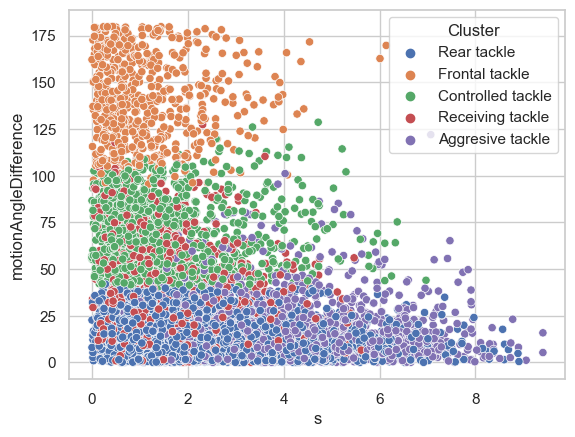

In [83]:
sns.scatterplot(data=X, x="s", y="motionAngleDifference", hue="Cluster")

In [84]:
#sns.scatterplot(data=X, x="yardsGained", y="motionAngleDifference", hue="Cluster")

In [85]:
sns.color_palette('rocket').as_hex()[5]

'#f6b48f'

<Axes: xlabel='speedDifference', ylabel='orientationDifference'>

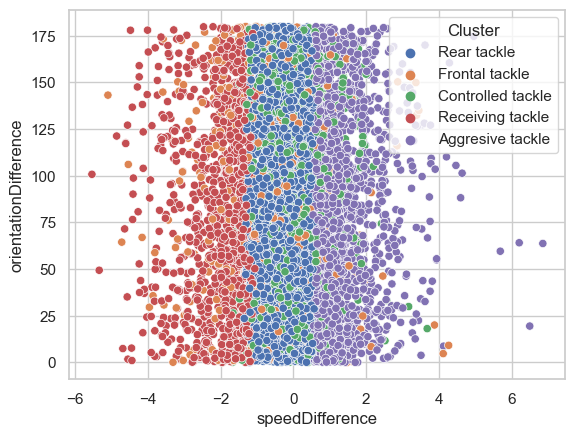

In [86]:
sns.scatterplot(data=X, x="speedDifference", y="orientationDifference", hue="Cluster")

<Axes: xlabel='speedDifference', ylabel='carrierDistance'>

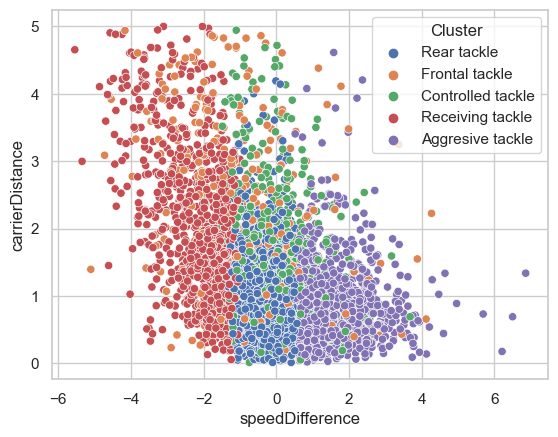

In [87]:
sns.scatterplot(data=X, x="speedDifference", y="carrierDistance", hue="Cluster")